# Prova I- Computação Centífica II
> Autor: Gil Miranda<br>
> Contato: gil.neto@ufrj.br; gilsmneto@gmail.com

## Set-up of dependencies and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##### Vectorized 4th Order Runge Kutta
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 26/10/2019
def rk_4(F, y0, ts, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = h*F(t, ys[-1], p)
        k2 = h*F(t + h/2, ys[-1] + k1/2, p)
        k3 = h*F(t + h/2, ys[-1] + k2/2, p)
        k4 = h*F(t + h, ys[-1] + k3)
        ynext = ys[-1] + (k1/6+k2/3+k3/3+k4/6)
        ys.append(ynext)
        t = tnext
    return ys[:-1]

---
## Creating the 4th and 3rd order Adams-Bashforth Method

The Adams-Bashforth method can be written as
$$
u_{k} = u_{k-1} + h\left(f_{k-1} + \frac{1}{2}\nabla f_{k-1}+ \frac{5}{12}\nabla^2 f_{k-1}+ \frac{9}{24}\nabla^3 f_{k-1} + \dots \right)
$$
And we can aproximate
$$
\begin{align}
\nabla f_{k-1} &= f_{k-1} - f_{k-2}\\
\nabla^2 f_{k-1} &= f_{k-1} - 2f_{k-2} + f_{k-3}\\
\nabla^3 f_{k-1} &= f_{k-1} - 3f_{k-2} + 3f_{k-3} - f_{k-4}\\
\end{align}
$$
So we have
$$
u_{k} = u_{k-1} + h\left(f_{k-1} + \frac{1}{2}(f_{k-1} - f_{k-2})+ \frac{5}{12}(f_{k-1} - 2f_{k-2} + f_{k-3}) + \frac{9}{24}(f_{k-1} - 3f_{k-2} + 3f_{k-3} - f_{k-4})\right)
$$
And collecting terms for the 3rd order and 4th order method, we can end with
$$
u_{k} = u_{k-1} + h\left(\frac{23}{12}f_{k-1} - \frac{16}{12}f_{k-2} + \frac{5}{12}f_{k-3}\right)
$$
for the 3rd order, and
$$
u_{k} = u_{k-1} + h\left(\frac{55}{24}f_{k-1} - \frac{59}{24}f_{k-2} + \frac{37}{24}f_{k-3} - \frac{9}{24}f_{k-4}\right)
$$
for the 4th order method<br>
We have to know the $f_{k-1},\dots, f_{k-n}$ points to solve using AB nth order method , we can solve for this $n$ points using Runge-Kutta

In [3]:
##### Adams-Bashfort 4th & 3rd order
### Input:  F -> Differential equation;
###         t0 -> initial point in time;
###         tf -> final point in time;
###         y0 -> initial condition;
###         h -> step size;
###         order -> order of the method;
### Output: ys -> list with all solutions for each step t;
###         ts -> list with all points in time;
##### Gil Miranda - last revision 29/10/2019
def adams_bash(F, t0, tf, y0, h, order = 3):
    if order == 4:
        ws = [55/24, -59/24, 37/24, -9/24] ## setting the weights for 4th order
    else:
        order = 3
        ws = [23/12, -16/12, 5/12] ## setting the weights for 3rd order
    ### initializing the list of points in time
    ts = [t0]
    for i in range(order-1):
        ts.append(ts[-1] + h)
    
    ### solving for the first n points with runge-kutta 4th order, so we can initiliaze AB method
    first_ys = rk_4(F, y0, ts)
    
    n = len(first_ys)
    ys = first_ys[:] ## list of solutions, initiliazed with rk4
    
    ### Adams-Bashfort
    while(ts[-1] <= tf):
        fs = [F(ts[-i], ys[-i]) for i in range(1,n+1)] ## list with f_k-1,...,f_k-n
        ynew = ys[-1]
        for (wi,fi) in zip(ws,fs):
            ynew += h*(wi*fi)
        ys.append(ynew)
        ts.append(ts[-1] + h)
    return ys, ts

#### The differential Equation

Here is the function that returns the differential equation
$$
\frac{\mathrm{d}u}{\mathrm{d}t} = 10e^{-\frac{(t-2)^2}{2(0.075)^2}} - 0.6u
$$

In [4]:
def eq_1(t,u, p=0):
    a = -(t-2)**2/(2*(0.075)**2)
    b = 10*np.e**a
    c = 0.6*u
    return b-c

#### Solving the Differential Equation with Adams-Bashforth 4th and 3rd Order

In [5]:
y0 = 0.5 # Initial Condition
hs = [0.01, 0.04, 0.06, 0.08] ## step size
hs_name = [hs[0], hs[0], hs[1], hs[1], hs[2], hs[2], hs[3], hs[3]] ## step size names for plotting
ys_3 = []
ts_3 = []
ys_4 = []
ts_4 = []
for h in hs:
    y_3, t_3 = adams_bash(eq_1, 0, 4, y0, h) ## solving order 3 for each step size
    y_4, t_4 = adams_bash(eq_1, 0, 4, y0, h, order = 4) ## solving order 4 for each step size
    ys_3.append(y_3)
    ts_3.append(t_3)
    ys_4.append(y_4)
    ts_4.append(t_4)

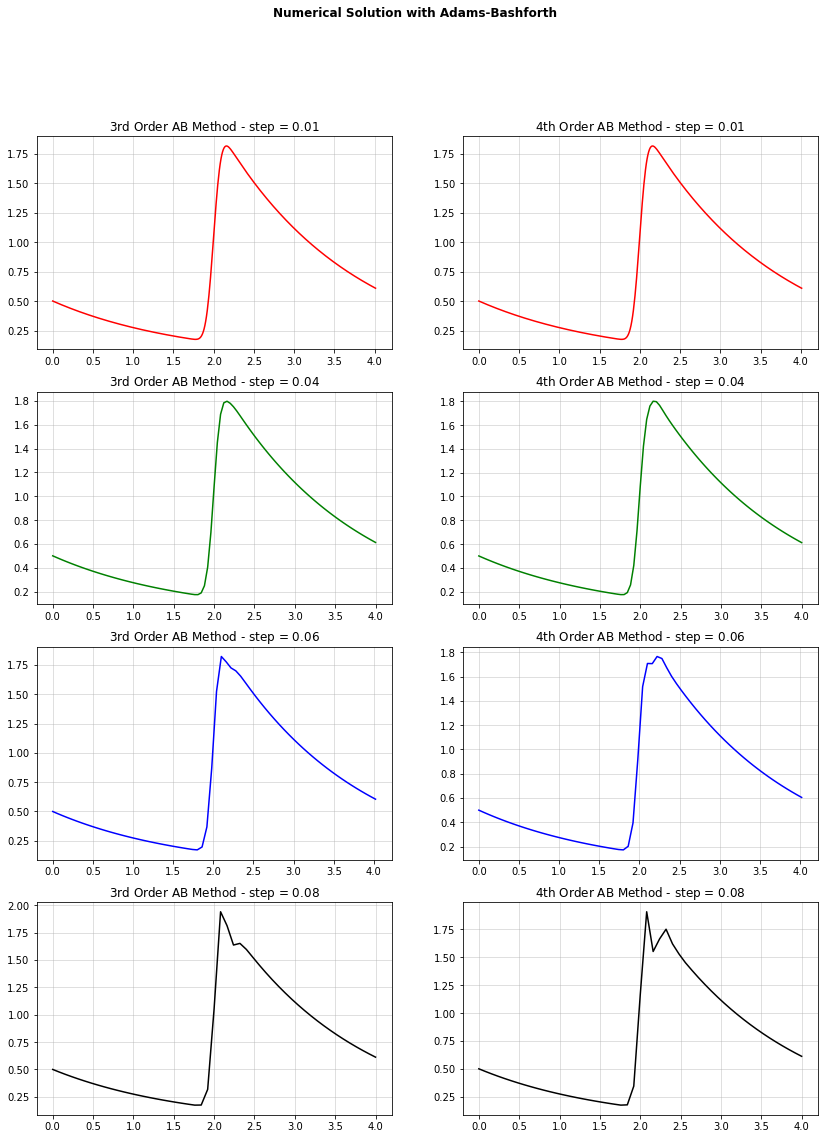

In [6]:
## plotting time
fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,18))
fig.suptitle('Numerical Solution with Adams-Bashforth', weight='bold')
names = ['3rd', '4th', '3rd', '4th', '3rd', '4th', '3rd', '4th']
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i,j,h in zip(axs,names,hs_name):
    i.set_title(j + ' Order AB Method - step = $' + str(h) + '$')

for a in axs:
    a.grid(alpha = 0.5)
ax1.plot(ts_3[0],ys_3[0], color = 'red')
ax2.plot(ts_4[0],ys_3[0], color = 'red')
ax3.plot(ts_3[1],ys_3[1], color = 'green')
ax4.plot(ts_4[1],ys_4[1], color = 'green')
ax5.plot(ts_3[2],ys_3[2], color = 'blue')
ax6.plot(ts_4[2],ys_4[2], color = 'blue')
ax7.plot(ts_3[3],ys_3[3], color = 'black')
ax8.plot(ts_4[3],ys_4[3], color = 'black')

plt.show()

#### Visualizing error between 3rd and 4th orders

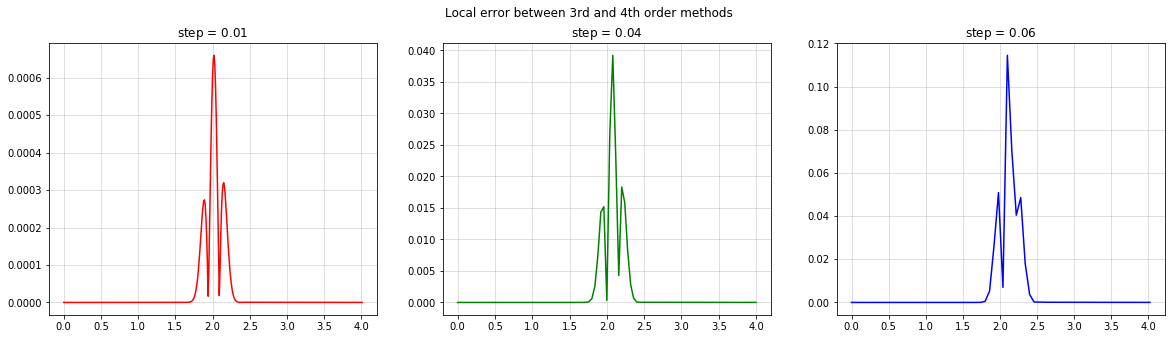

In [7]:
## calculating the local error
err = []
for j in range(3):
    e = [abs(ys_4[j][i] - abs(ys_3[j][i])) for i in range(len(ys_4[j]))]
    err.append(e)

## plotting time
fig, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('Local error between 3rd and 4th order methods')
axs = [ax1, ax2, ax3]
for i,h in zip(axs,hs):
    i.set_title('step = $' + str(h) + '$')

for a in axs:
    a.grid(alpha = 0.5)
ax1.plot(ts_3[0],err[0], color = 'red')
ax2.plot(ts_4[1],err[1], color = 'green')
ax3.plot(ts_3[2],err[2], color = 'blue')

plt.show()

--- 
## Adaptative Adams-Bashforth Method

In [8]:
##### Adaptative Adams-Bashfort 4th & 3rd order
### Input:  F -> Differential equation;
###         t0 -> initial point in time;
###         tf -> final point in time;
###         y0 -> initial condition;
###         h -> step size;
###         tol -> error tolerance;
### Output: ys -> list with all solutions for each step t;
###         ts -> list with all points in time;
##### Gil Miranda - last revision 30/10/2019
def adams_bash_adp(F, t0, tf, y0, h, tol = 1e-3):
    
    ws_4 = [55/24, -59/24, 37/24, -9/24] ## setting the weights for 4th order
    ws_3 = [23/12, -16/12, 5/12] ## setting the weights for 3rd order
    
    ### initializing the list of points in time
    ts = [t0]
    for i in range(4):
        ts.append(ts[-1] + h)
    
    ### solving for the first n points with runge-kutta 4th order, so we can initiliaze AB method
    first_ys = rk_4(F, y0, ts)
    
    ys = first_ys[:] ## list of solutions, initiliazed with rk4
    
    ### Adptative Adams-Bashfort
    while(ts[-1] <= tf):
        fs = [F(ts[-i], ys[-i]) for i in range(1,5)] ## list with f_k-1,...,f_k-n
        
        ## Solving with 3rd order
        ynew = ys[-1]
        for (wi,i) in zip(ws_3, range(3)):
            ynew += h*(wi* fs[i])
        
        ## Solving with 4th order (using 3rd order points)
        ynew_til = ys[-1]
        for (wi, i) in zip(ws_4, range(4)):
            ynew_til += h*(wi * fs[i])
            
        ## Local error
        err = abs(ynew_til - ynew)
        
        ## if err < tol we accept the solution
        if err <= tol:
            ys.append(ynew)
            tnext = ts[-1] + h
            ts.append(tnext)
            h = h*(tol/err)**(1/4)
        else:
            ## else, we get a new step
            h = h/2
        
    return ys, ts

### Visualizing Solutions

In [9]:
t0 = 0
tf = 4
h = 0.1
y0 = 0.5

In [10]:
ys_1, ts_1 = adams_bash_adp(eq_1, t0, tf, y0, h, tol = 1e-3)
ys_2, ts_2 = adams_bash_adp(eq_1, t0, tf, y0, h, tol = 1e-4)

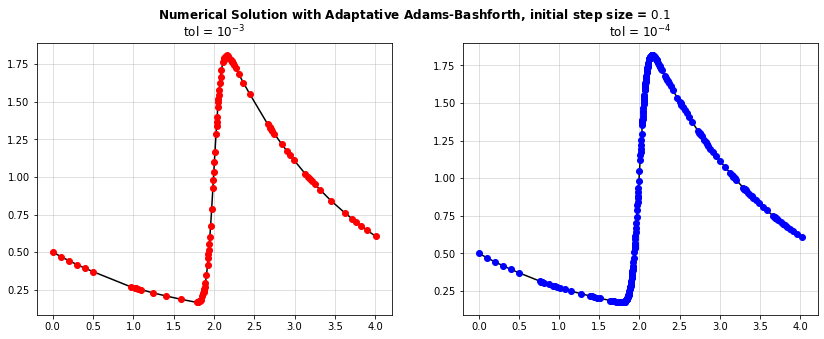

In [11]:
## plotting time
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
fig.suptitle('Numerical Solution with Adaptative Adams-Bashforth, initial step size = $' + str(h) + '$', weight='bold')
# names = ['3rd', '4th', '3rd', '4th', '3rd', '4th']
axs = [ax1, ax2]
for a in axs:
    a.grid(alpha = 0.5)
    
ax1.plot(ts_1,ys_1, color = 'black')
ax1.plot(ts_1,ys_1, 'o', color = 'red')
ax1.set_title('tol = $10^{-3}$')

ax2.plot(ts_2,ys_2, color = 'black')
ax2.plot(ts_2,ys_2, 'o', color = 'blue')
ax2.set_title('tol = $10^{-4}$')

plt.show()

---
### Bonus Method: Predictor-Corrector Adams-Bashforth-Moulton 4th order Method

Predictor equation (4th order AB)
$$
u_{k} = u_{k-1} + h\left(\frac{55}{24}f_{k-1} - \frac{59}{24}f_{k-2} + \frac{37}{24}f_{k-3} - \frac{9}{24}f_{k-4}\right)
$$
Corrector equation (4th order AM)
$$
u_{k} = u_{k-1} + h\left(\frac{9}{24}f_{k} + \frac{19}{24}f_{k-1} - \frac{5}{24}f_{k-2} + \frac{1}{24}f_{k-3}\right)
$$

We initialize the AB with RK4, and then uses AB $f_k$ to initialize the AM, and then compute the error between the steps, if $err > tol$, tol is given tolerance, calculate again

In [12]:
##### Adams-Bashfort-Moulton 4th order
### Input:  F -> Differential equation;
###         t0 -> initial point in time;
###         tf -> final point in time;
###         y0 -> initial condition;
###         h -> step size;
###         order -> order of the method;
### Output: ys -> list with all solutions for each step t;
###         ts -> list with all points in time;
##### Gil Miranda - last revision 29/10/2019
def adams_bash_mou(F, t0, tf, y0, h, tol = 1e-12):
    ws_ab = [55/24, -59/24, 37/24, -9/24] ## setting the weights for adams bashforth
    ws_am = [9/24, 19/24, -5/24, 1/24] ## setting the weights for adams moulton
    
    ### initializing the list of points in time
    ts = [t0]
    for i in range(3):
        ts.append(ts[-1] + h)
    
    ### solving for the first n points with runge-kutta 4th order, so we can initiliaze AB method
    first_ys = rk_4(F, y0, ts)
    
    n = len(first_ys)
    ys = first_ys[:] ## list of solutions, initiliazed with rk4
    
    while(ts[-1] <= tf):
        ## Calculating the AB solution
        fs_ab = [F(ts[-i], ys[-i]) for i in range(1,n+1)] ## list with f_k-1,...,f_k-n
        y_ab = ys[-1]
        for (wi,fi) in zip(ws_ab,fs_ab):
            y_ab += h*(wi*fi)
            
        ## Generating next point in time
        tnext = ts[-1] + h
        
        ## Generating the f(ti,yi) point to use with AM
        f1_am = F(tnext, y_ab)
        fs_am = [f1_am] + fs_ab[:-1]
        
        ## Calculating the AM solution
        y_am = ys[-1]
        for (wi,fi) in zip(ws_am,fs_am):
            y_am += h*(wi*fi)

        ## error
        err = abs(y_am - y_ab)
        y_old = y_am
        y_new = y_am
        
        while(err > tol):
            ## Calculating another solution with AM using last AM solution
            f1_new = F(tnext, y_old)
            fs_new = [f1_new] + fs_ab[:-1]
            y_new = ys[-1]
            for (wi,fi) in zip(ws_am,fs_new):
                y_new += h*(wi*fi)
            err = abs(y_new - y_old)
            y_old = y_new
        ys.append(y_new)
        ts.append(tnext)
    return ys, ts

In [13]:
ys_5, ts_5 = adams_bash_mou(eq_1, 0, 4, 0.5, 0.04, tol = 1e-14)

In [14]:
y0 = 0.5 # Initial Condition
hs = [0.01, 0.04, 0.06, 0.08] ## step size
hs_name = [hs[0], hs[1], hs[2], hs[3]] ## step size names for plotting
ys_5 = []
ts_5 = []
for h in hs:
    y_5, t_5 = adams_bash_mou(eq_1, 0, 4, y0, h) ## solving for each step with predictor-corrector
    ys_5.append(y_5)
    ts_5.append(t_5)

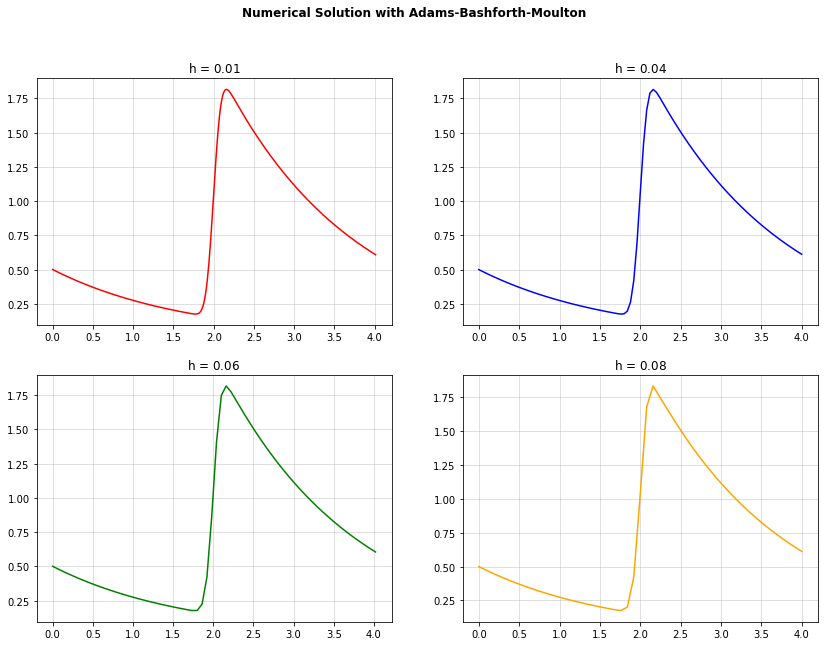

In [15]:
## plotting time
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.suptitle('Numerical Solution with Adams-Bashforth-Moulton', weight='bold')
axs = [ax1, ax2, ax3, ax4]

for i,h in zip(axs,hs_name):
    i.set_title('h = $' + str(h) + '$')

for a in axs:
    a.grid(alpha = 0.5)
ax1.plot(ts_5[0],ys_5[0], color = 'red')
ax2.plot(ts_5[1],ys_5[1], color = 'blue')
ax3.plot(ts_5[2],ys_5[2], color = 'green')
ax4.plot(ts_5[3],ys_5[3], color = 'orange')


plt.show()

Unlike the AB 3rd and 4th order methods, we can get a decent solution even with step size $h = 0.08$ with the ABM method<br>

Plotting the solutions for each step-size with AB4, AB Adaptative, ABM

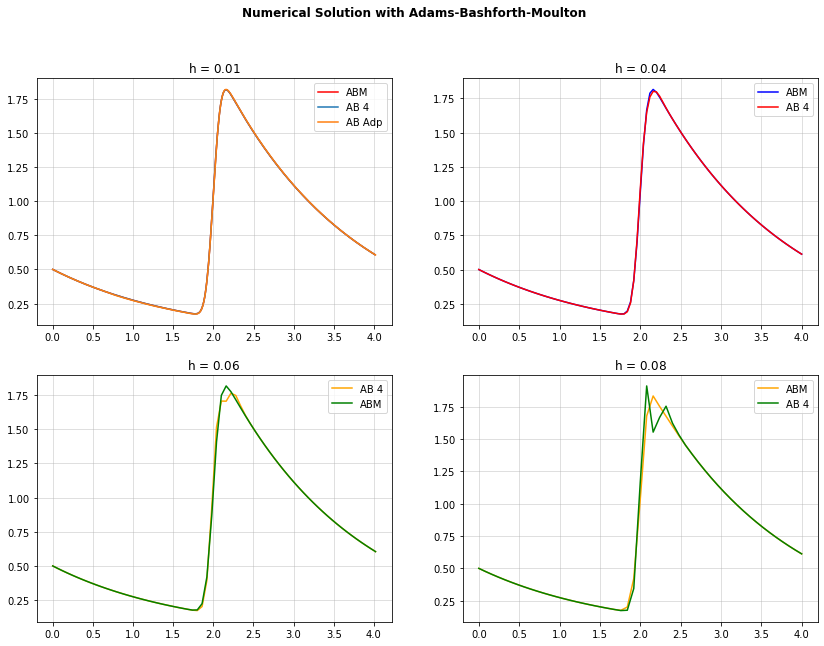

In [16]:
## plotting time
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.suptitle('Numerical Solution with Adams-Bashforth-Moulton', weight='bold')
axs = [ax1, ax2, ax3, ax4]

for i,h in zip(axs,hs_name):
    i.set_title('h = $' + str(h) + '$')

for a in axs:
    a.grid(alpha = 0.5)
ax1.plot(ts_5[0],ys_5[0], color = 'red', label = 'ABM')
ax1.plot(ts_4[0], ys_4[0], label = 'AB 4')
ax1.plot(ts_2, ys_2, label = 'AB Adp')

ax2.plot(ts_5[1],ys_5[1], color = 'blue', label = 'ABM')
ax2.plot(ts_4[1], ys_4[1], color = 'red', label = 'AB 4')

ax3.plot(ts_4[2], ys_4[2], color = 'orange', label = 'AB 4')
ax3.plot(ts_5[2],ys_5[2], color = 'green', label = 'ABM')

ax4.plot(ts_5[3],ys_5[3], color = 'orange', label = 'ABM')
ax4.plot(ts_4[3], ys_4[3], color = 'green', label = 'AB 4')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()